# 0. Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
# import plotly.plotly as py
# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)
# import plotly.graph_objs as go
# import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

# 1. Read Dataset

In [2]:
df = pd.read_csv('candidate.csv')

In [3]:
df

,time,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78
0,2015-11-18 09:30:00,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,NaN,NaN,NaN
1,2015-11-18 09:35:00,0.001689,-0.001088,0.000058,0.000615,85.97,NaN,NaN,NaN,15.53,...,1.0004,1.0006,1.0001,1.0005,1.0006,1.0000,1.0006,67368.450,11762.0,933.0
2,2015-11-18 09:40:00,0.004288,0.004110,0.001356,0.000040,85.90,NaN,NaN,NaN,15.46,...,1.0003,1.0012,1.0003,1.0009,1.0013,1.0001,1.0012,46947.150,7726.0,469.0
3,2015-11-18 09:45:00,0.000268,0.008612,0.006797,-0.001845,85.84,NaN,NaN,NaN,15.74,...,1.0010,1.0007,0.9988,1.0019,1.0012,0.9988,1.0024,23487.700,5967.0,398.0
4,2015-11-18 09:50:00,0.001404,-0.005846,-0.003133,0.001615,85.15,NaN,NaN,NaN,15.76,...,1.0008,1.0004,0.9991,1.0013,1.0010,0.9989,1.0022,40561.200,6341.0,393.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2020-12-07 14:11:00,-0.000019,0.000390,0.000007,-0.000126,99.52,11.00,11.06,11.01,12.08,...,1.0001,1.4803,1.4799,1.0003,1.4806,1.4799,1.0005,NaN,697.0,38.0
99996,2020-12-07 14:16:00,0.000281,0.000352,0.000380,-0.000022,99.60,11.01,11.08,11.03,12.10,...,1.0001,1.4802,1.4798,1.0003,1.4805,1.4797,1.0005,NaN,940.0,62.0
99997,2020-12-07 14:21:00,-0.000741,-0.000277,-0.000005,-0.000143,99.40,11.02,11.08,11.04,12.11,...,1.0002,1.4802,1.4797,1.0003,1.4805,1.4797,1.0005,2364.500,612.0,43.0
99998,2020-12-07 14:26:00,0.001594,0.002589,0.000373,-0.000308,100.08,11.07,11.13,11.08,12.15,...,1.0003,1.4799,1.4789,1.0006,1.4804,1.4789,1.0010,21739.125,2846.0,132.0


# 2. Primary Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 80 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    100000 non-null  object 
 1   f0      100000 non-null  float64
 2   f1      100000 non-null  float64
 3   f2      100000 non-null  float64
 4   f3      100000 non-null  float64
 5   f4      96555 non-null   float64
 6   f5      64334 non-null   float64
 7   f6      64328 non-null   float64
 8   f7      64346 non-null   float64
 9   f8      98900 non-null   float64
 10  f9      98668 non-null   float64
 11  f10     98641 non-null   float64
 12  f11     96484 non-null   float64
 13  f12     96267 non-null   float64
 14  f13     79094 non-null   float64
 15  f14     99747 non-null   float64
 16  f15     99747 non-null   float64
 17  f16     100000 non-null  float64
 18  f17     100000 non-null  float64
 19  f18     100000 non-null  float64
 20  f19     100000 non-null  float64
 21  f20     100

In [5]:
res = df.describe().T
res['CoV'] = res['std']/res['mean']
res.T

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78
count,100000.000000,100000.000000,100000.000000,100000.000000,96555.000000,64334.000000,64328.000000,64346.000000,98900.000000,98668.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,52024.000000,99734.000000,99734.000000
mean,-0.000003,-0.000020,-0.000004,0.000004,88.815905,14.831080,14.515719,14.651709,15.086703,14.071026,...,1.000306,1.219275,1.218314,1.000805,1.219843,1.217659,1.001830,22688.337769,6319.395061,167.161169
std,0.001820,0.003225,0.001788,0.000648,12.894039,4.128563,4.272675,4.209654,3.327054,3.829419,...,0.000266,0.119277,0.119389,0.000629,0.119202,0.119456,0.001337,22031.816466,7177.081966,172.307057
min,-0.026390,-0.088035,-0.029476,-0.013172,60.200000,9.100000,8.710000,8.960000,9.740000,7.260000,...,1.000000,0.998000,0.997300,1.000000,0.998500,0.997300,1.000000,226.625000,0.000000,0.000000
25%,-0.000895,-0.001451,-0.000738,-0.000277,80.530000,11.980000,11.550000,11.720000,13.070000,11.690000,...,1.000100,1.129500,1.128100,1.000400,1.130400,1.127375,1.001000,8011.475000,1935.250000,63.000000
50%,-0.000001,-0.000028,0.000000,0.000004,86.960000,13.920000,13.510000,13.700000,14.375000,13.230000,...,1.000200,1.180700,1.179600,1.000600,1.181500,1.178900,1.001500,16918.762500,3926.000000,120.000000
75%,0.000868,0.001357,0.000705,0.000294,94.880000,16.420000,16.140000,16.220000,16.260000,15.460000,...,1.000400,1.333800,1.333000,1.001000,1.334300,1.332400,1.002300,30312.700000,7818.000000,212.000000
max,0.075657,0.073741,0.022982,0.020598,989.190000,50.930000,51.620000,50.780000,49.110000,60.170000,...,1.009300,1.481100,1.480400,1.025000,1.481100,1.479900,1.034200,377127.750000,99960.000000,5141.000000
CoV,-563.716380,-161.924878,-427.831028,157.061340,0.145177,0.278372,0.294348,0.287315,0.220529,0.272149,...,0.000266,0.097826,0.097996,0.000628,0.097719,0.098103,0.001334,0.971063,1.135723,1.030784


# 3. Get Returns Column

In [6]:
df['return'] = (df['f24'].shift(-78) - df['f24'])/df['f24']

In [7]:
df[['time','return']][2422:2430]

,time,return
2422,2015-12-31 15:50:00,-0.001231
2423,2015-12-31 15:55:00,-0.002260
2424,2015-12-31 16:00:00,-0.009217
2425,2016-01-01 09:34:00,-0.004200
2426,2016-01-01 09:39:00,-0.002461
2427,2016-01-01 09:44:00,-0.007379
2428,2016-01-01 09:49:00,-0.005428
2429,2016-01-01 09:54:00,-0.002967


# 4. Data Visualization

In [8]:
import dtale
data = df

# Assigning a reference to a running D-Tale process.
d = dtale.show(df)

In [9]:
d

# Using the given code

In [10]:
df_orig = pd.read_csv('candidate.csv')

In [11]:
class Model:

    def create_target_variable(self,df):
        df['return'] = (df['f24'].shift(-78) - df['f24'])/df['f24']
        return df
    
    
    def prepare_features(self, df):
        """
        :param df: this is the data you want to use to prepare the features for your model
        :return: X, a matrix of features (can be a numpy array or a pandas dataframe, your choice!)
        """
        # todo: implement this function - you can use some of the features given to you or you can build a batch of
        #  your own based on the data that you are given.
        # *** PLEASE ENSURE THAT DO NOT INTRODUCE A LOOKAHEAD IN THIS MATRIX ***
        # *** Bonus points for coding a function that tests against lookahead in X ***\
        
        '''
        create_target_variable <done>
        handle mising value <not applicable>
        '''
        
        # Target Variable
        df = self.create_target_variable(df)
        
        return df

    
    def fit(self, path_to_train_csv, *args, **kwargs):
        # todo: read train csv
        # todo: do any operation you would like on it

        # todo: prepare features for the model fit
        X = self.prepare_features(some_dataframe)

        # todo: fit your model here - use X (features matrix), y (the target variable) and any other information you
        #  want to use

        # this follows the scikit-learn pattern by returning self
        return self

    
    def predict(self, path_to_test_csv, *args, **kwargs):
        # todo: read test csv
        # todo: do any operation you would like on it

        # todo: prepare features for the model predict
        X = self.prepare_features(some_dataframe)

        # todo: calculate your model prediction (call it ypred) using X and any other information you want to use

        # this follows the scikit-learn pattern by returning ypred
        return ypred

In [12]:
clf = Model()
df = df_orig.copy()
df = clf.create_target_variable(df)

In [13]:
df

,time,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f70,f71,f72,f73,f74,f75,f76,f77,f78,return
0,2015-11-18 09:30:00,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,NaN,NaN,NaN,-0.001000
1,2015-11-18 09:35:00,0.001689,-0.001088,0.000058,0.000615,85.97,NaN,NaN,NaN,15.53,...,1.0006,1.0001,1.0005,1.0006,1.0000,1.0006,67368.450,11762.0,933.0,-0.001797
2,2015-11-18 09:40:00,0.004288,0.004110,0.001356,0.000040,85.90,NaN,NaN,NaN,15.46,...,1.0012,1.0003,1.0009,1.0013,1.0001,1.0012,46947.150,7726.0,469.0,-0.009642
3,2015-11-18 09:45:00,0.000268,0.008612,0.006797,-0.001845,85.84,NaN,NaN,NaN,15.74,...,1.0007,0.9988,1.0019,1.0012,0.9988,1.0024,23487.700,5967.0,398.0,-0.009341
4,2015-11-18 09:50:00,0.001404,-0.005846,-0.003133,0.001615,85.15,NaN,NaN,NaN,15.76,...,1.0004,0.9991,1.0013,1.0010,0.9989,1.0022,40561.200,6341.0,393.0,-0.010519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2020-12-07 14:11:00,-0.000019,0.000390,0.000007,-0.000126,99.52,11.00,11.06,11.01,12.08,...,1.4803,1.4799,1.0003,1.4806,1.4799,1.0005,NaN,697.0,38.0,NaN
99996,2020-12-07 14:16:00,0.000281,0.000352,0.000380,-0.000022,99.60,11.01,11.08,11.03,12.10,...,1.4802,1.4798,1.0003,1.4805,1.4797,1.0005,NaN,940.0,62.0,NaN
99997,2020-12-07 14:21:00,-0.000741,-0.000277,-0.000005,-0.000143,99.40,11.02,11.08,11.04,12.11,...,1.4802,1.4797,1.0003,1.4805,1.4797,1.0005,2364.500,612.0,43.0,NaN
99998,2020-12-07 14:26:00,0.001594,0.002589,0.000373,-0.000308,100.08,11.07,11.13,11.08,12.15,...,1.4799,1.4789,1.0006,1.4804,1.4789,1.0010,21739.125,2846.0,132.0,NaN


# 5. Properties of Time Series

### Stationarity
- Univariate: Stationarity is crucial to have any predicting power
- Multivariate == Linear Regression with Time Series error: Stationarity is crucial for error to have consistent linear unbiased estimators

- Weak Stationarity: (i) E[$r_{t}$] = $\mu$; (ii) define: $\gamma_l$ = cov($r_{t},r_{t-l}$); then (a) $\gamma_{0}$ = var($r_{t}$), (b) $\gamma_{l}$ = $\gamma_{-l}$

### Autocorrelation

- Link: https://stats.stackexchange.com/tags/autocorrelation/info
- Important: (i) Understand temporal property within same series; (ii) can indicate non-stationarity, $-1 <= \rho_l <= 1$ and $\rho_0 = 0$



### 5.1 Autocorrelation

#### 5.1.1 ACF Plot

In [14]:
ret = df['return'].dropna()
ret

0       -0.001000
1       -0.001797
2       -0.009642
3       -0.009341
4       -0.010519
           ...   
99917   -0.000327
99918   -0.001468
99919   -0.001632
99920   -0.001955
99921   -0.000163
Name: return, Length: 99922, dtype: float64

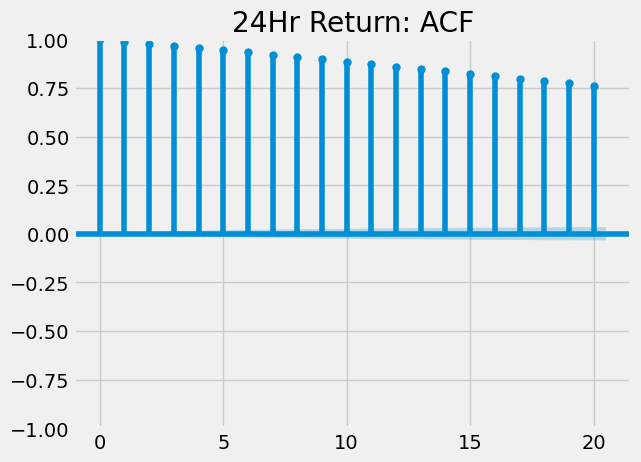

In [15]:
from statsmodels.graphics.tsaplots import *

# plt.figure(figsize=(10, 6))
plot_acf(ret,lags=20,title='24Hr Return: ACF')
plt.show()

#### 5.1.2 PACF Plot

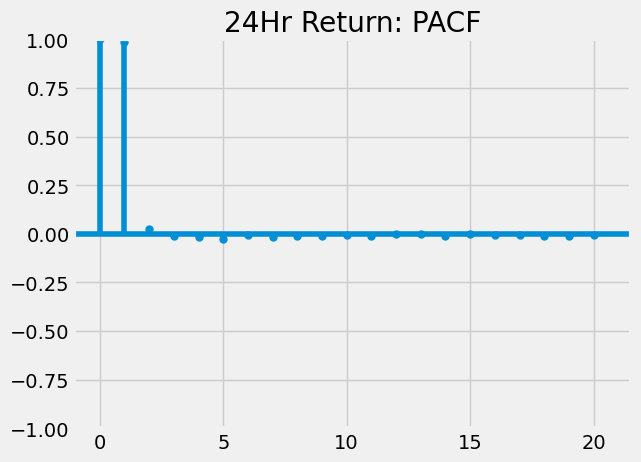

In [16]:
# plt.figure(figsize=(10, 6))
plot_pacf(ret,lags=20,title='24Hr Return: PACF')
plt.show()

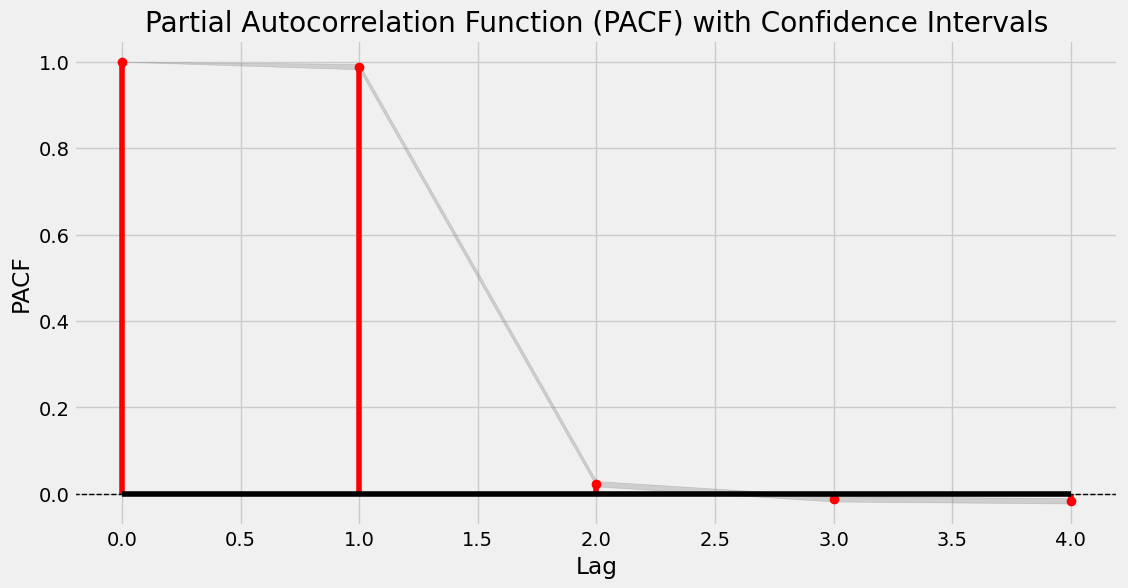

In [17]:
import statsmodels.api as sm
# Compute the PACF
pacf, conf_int = sm.tsa.pacf(ret, nlags=4, alpha=0.05)

# Create a DataFrame for PACF and CI
pacf_df = pd.DataFrame({'PACF': pacf, 'Lower CI': conf_int[:, 0], 'Upper CI': conf_int[:, 1]})

# Create the PACF plot
plt.figure(figsize=(12, 6))
plt.stem(pacf_df.index, pacf_df['PACF'], markerfmt='ro', linefmt='r-', basefmt='k-', use_line_collection=True)
plt.axhline(y=0, color='k', linestyle='--', linewidth=1)
plt.fill_between(pacf_df.index, pacf_df['Lower CI'], pacf_df['Upper CI'], color='gray', alpha=0.3)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF) with Confidence Intervals')
plt.grid(True)
plt.show()


#### 5.1.3 Ljung Box Test Statistic

Test that jointly all rho's are zero

In [18]:
def white_noise_test(ret):
    import statsmodels.api as sm
    return sm.stats.acorr_ljungbox(ret, lags=[10,20,30,40], return_df=True)

In [19]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(ret, lags=[10,20,30,40], return_df=True)

,lb_stat,lb_pvalue
10,8.794268e+05,0.0
20,1.547151e+06,0.0
30,2.029342e+06,0.0
40,2.356826e+06,0.0


### 5.2 Stationarity

#### 5.2.1 Augmented Dicky Fuller Test

In [20]:
def stationarity_test(ret):
    from statsmodels.tsa.stattools import adfuller
    adf = adfuller(ret.diff().dropna())
    print("p-value: {}".format(float(adf[1])))
    result = [{'Test Statistic':adf[0], 'pvalue':adf[1], 'usedlag':adf[2], 'num_obs':adf[3],'1pct_sig':adf[4]['1%'],
           '5pct_sig':adf[4]['5%'],'10pct_sig':adf[4]['10%'], 'best_ic':adf[5]}]
    return result

In [21]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(ret.diff().dropna())
print("p-value: {}".format(float(adf[1])))

p-value: 0.0


In [22]:
result = [{'Test Statistic':adf[0], 'pvalue':adf[1], 'usedlag':adf[2], 'num_obs':adf[3],'1pct_sig':adf[4]['1%'],
           '5pct_sig':adf[4]['5%'],'10pct_sig':adf[4]['10%'], 'best_ic':adf[5]}]

In [23]:
pd.DataFrame(result)

,Test Statistic,pvalue,usedlag,num_obs,1pct_sig,5pct_sig,10pct_sig,best_ic
0,-40.153396,0.0,55,99865,-3.430415,-2.861569,-2.566785,-907048.05724


# 6. Modeling Non-Stationary Return Series

### 6.1 Making Series Stationary

In [24]:
def ts_plot(ret):
    # series plot
    plt.figure(figsize=(12, 6))
    plt.plot(ret)
    plt.xlabel('Time')
    plt.ylabel('Returns')
    plt.title('Return Distribution')
    plt.grid(True)
    plt.show()

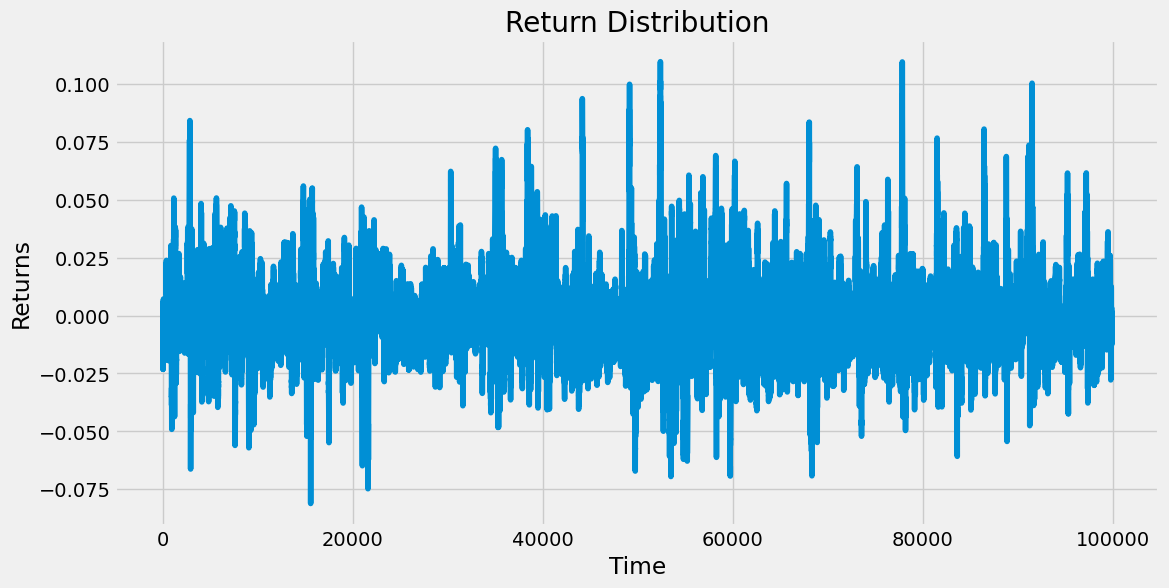

In [25]:
ts_plot(ret)

In [26]:
# augmented dicky fuller on return series
stationarity_test(ret)

p-value: 0.0


[{'Test Statistic': -40.15339569742533,
  'pvalue': 0.0,
  'usedlag': 55,
  'num_obs': 99865,
  '1pct_sig': -3.430415483083111,
  '5pct_sig': -2.861568942496383,
  '10pct_sig': -2.5667854050781354,
  'best_ic': -907048.0572396519}]

Null Hypothesis that series is unit root non-stationary is rejected. Hence, series is stationary

In [27]:
def winsorize_series(ret):
    from scipy.stats.mstats import winsorize
    win_ret = winsorize(ret,(0.05,0.05))
    win_ret = pd.Series(win_ret)
    return win_ret

In [28]:
### Winsorize
from scipy.stats.mstats import winsorize
win_ret = winsorize(ret,(0.05,0.05))
win_ret = pd.Series(win_ret)

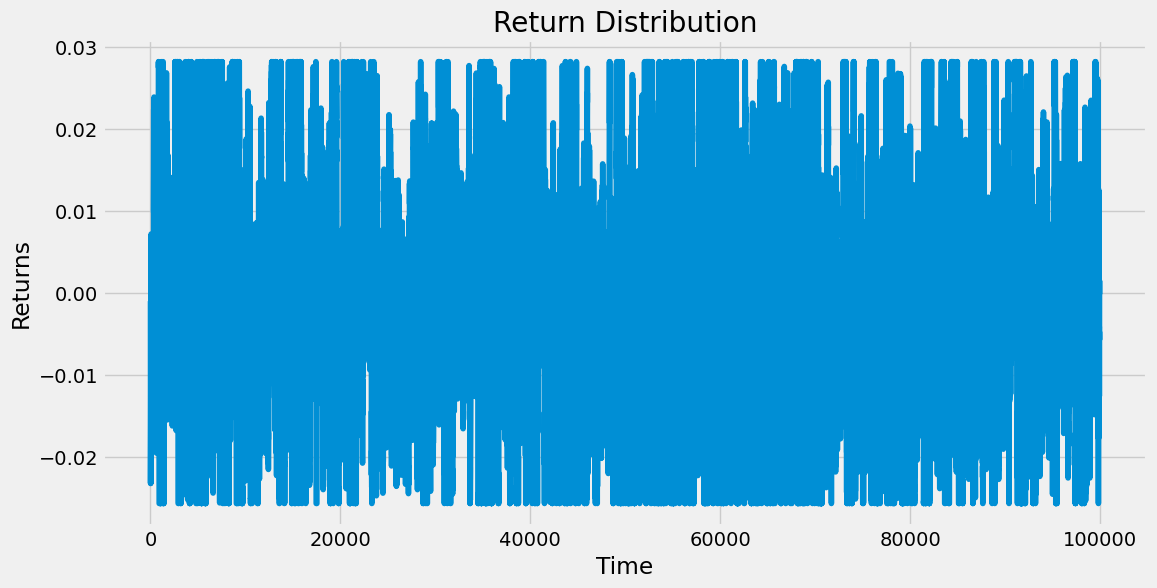

In [29]:
# series plot
ts_plot(win_ret)

In [30]:
stationarity_test(win_ret)

p-value: 0.0


[{'Test Statistic': -39.93538658576651,
  'pvalue': 0.0,
  'usedlag': 60,
  'num_obs': 99860,
  '1pct_sig': -3.4304154863619396,
  '5pct_sig': -2.861568943945558,
  '10pct_sig': -2.5667854058494832,
  'best_ic': -932006.0647628172}]

### 6.2 Model

In [31]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'series' is your time series data

# Define a range of p and q values to test
p_values = range(4, 5)  # You can adjust this range based on your data
q_values = range(0, 5)  # You can adjust this range based on your data

In [32]:
# best_aic = np.inf
# best_p = 0
# best_q = 0

In [33]:
# Iterate through different p and q values and select the best model
for p in p_values:
    for q in q_values:
#         try:
            model = ARIMA(ret, order=(p, 0, q))
            results = model.fit()
            aic = results.aic
            if aic < best_aic:
                best_aic = aic
                best_p = p
                best_q = q
#         except Exception as e:
#             continue

print(f"Optimal p: {best_p}")
print(f"Optimal q: {best_q}")
print(f"Best AIC: {best_aic}")

C:\Users\anshu\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



NameError: name 'best_aic' is not defined

In [ ]:
best_aic

In [ ]:
best_p

In [ ]:
best_q

In [ ]:
p,q

In [ ]:
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

p, d, q = best_p, 0, best_q  # Example order parameters
model = ARIMA(ret, order=(p, d, q))
model_fit = model.fit()

In [ ]:
# Print the model summary
print(model_fit.summary())

In [ ]:
resid = model_fit.resid

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(resid)
print("p-value: {}".format(float(adf[1])))

In [ ]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(resid, lags=[10,20,30,40], return_df=True)

In [ ]:
ret_pred = model.fit().predict()

In [ ]:
from statsmodels.tools.eval_measures import rmse
rmse = rmse(ret, ret_pred)

In [ ]:
ret

In [ ]:
ret_pred

In [ ]:
rmse

In [ ]:
np.mean(abs(ret)),np.min(ret),np.max(ret),np.median(ret)

In [ ]:
model_fit.plot_predict(start=450, end=550)
plt.show()

In [ ]:
# Plot the original 'return' series and the model's predictions
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['return'], label='Original Series', color='blue')
plt.plot(df['time'], model_fit.fittedvalues, color='red', label='Fitted Values')
plt.xlabel('Time')
plt.ylabel('Return')
plt.title('ARIMA Model for Return Column')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# if __name__ == '__main__':
#     train_csv_path = 'put your local path here'
#     test_csv_path = 'put your local path here'

#     fit_args = []  # todo: populate this as you see fit
#     fit_kwargs = {}  # todo: populate this as you see fit
#     clf = Model()
#     clf.fit(train_csv_path, *fit_args, **fit_kwargs)

#     predict_args = []  # todo: populate this as you see fit
#     predict_kwargs = {}  # todo: populate this as you see fit
#     ypred = clf.predict(test_csv_path, *predict_args, **predict_kwargs)

2024-01-18 20:18:33,481 - INFO     - Executing shutdown due to inactivity...
2024-01-18 20:18:45,744 - INFO     - Executing shutdown...
2024-01-18 20:18:45,747 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer
